In [45]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import holidays

# ETL (Extract Transform Load)
Neste desafio será baixado um arquivo csv do site do Kaggle e realizado todo o processamento de ETL. Essa prática está vinculada ao desafio do bootcamp santander da Digital Innovation One.

Link do dataset: https://www.kaggle.com/datasets/tgomesjuliana/police-traffic-incidents

Esta base de dados contém informações sobre incidentes de transito ocorrido em 2023 em todo o Brasil.

In [46]:
# Extract
# Importando o dataset (arquivo csv)
df = pd.read_csv('Dados_PRF_2023.csv', sep=';', encoding='latin-1')
df.shape

(32440, 30)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32440 entries, 0 to 32439
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      32440 non-null  int64  
 1   data_inversa            32440 non-null  object 
 2   dia_semana              32440 non-null  object 
 3   horario                 32440 non-null  object 
 4   uf                      32440 non-null  object 
 5   br                      32362 non-null  float64
 6   km                      32362 non-null  object 
 7   municipio               32440 non-null  object 
 8   causa_acidente          32440 non-null  object 
 9   tipo_acidente           32440 non-null  object 
 10  classificacao_acidente  32440 non-null  object 
 11  fase_dia                32440 non-null  object 
 12  sentido_via             32440 non-null  object 
 13  condicao_metereologica  32440 non-null  object 
 14  tipo_pista              32440 non-null

# Trasformação dos dados
Nesta etapa será realizado a limpeza, o entendimento do dataset, visualizações e transformações dos dados.
Verificando os dados visualmente podemos perceber que existem dados faltantes e para este caso iremos deletar as linhas que possuem dados faltantes.

In [48]:
# Retirar dados nulos
df.dropna(inplace=True)
df.shape

(32073, 30)

<Axes: >

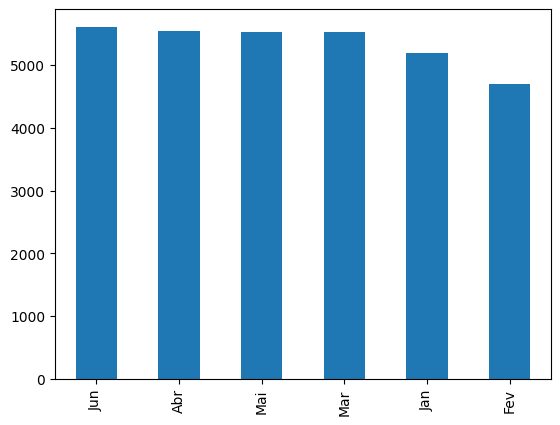

In [49]:
# Incluir colunas com os meses
df['mes'] = pd.DatetimeIndex(df['data_inversa']).month

# Alterando o número do mês para o nome do mês
df['mes'] = df['mes'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                               11, 12], ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                         'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Numero de acidentes por mês
df['mes'].value_counts().plot.bar()


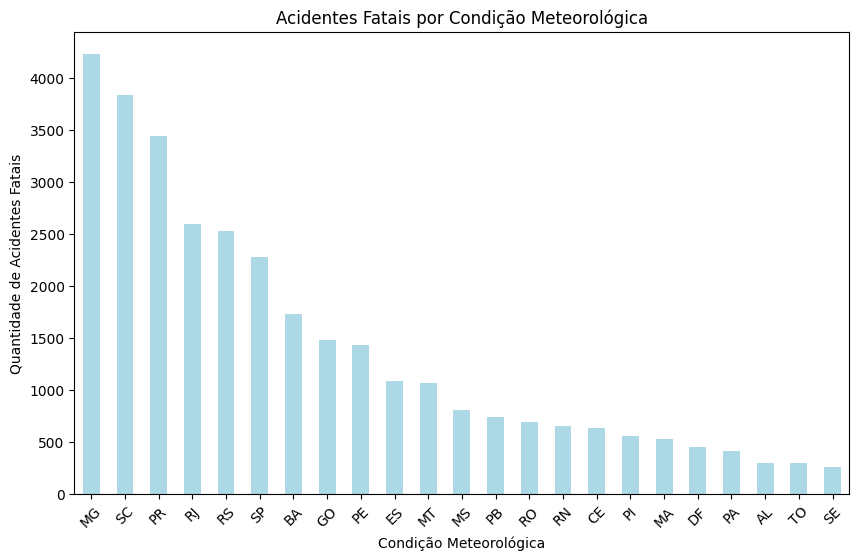

In [50]:
# Verificando qual estado teve maior número de acidentes
num_acidentes = df['uf'].value_counts()
plt.figure(figsize=(10, 6))
num_acidentes.plot(kind='bar', color='lightblue')
plt.title('Acidentes Fatais por Condição Meteorológica')
plt.xlabel('Condição Meteorológica')
plt.ylabel('Quantidade de Acidentes Fatais')
plt.xticks(rotation=45)
plt.show()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_7480\1730991893.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_com_vitimas_fatais['condicao_metereologica'] = acidentes_com_vitimas_fatais['condicao_metereologica'].str.replace('Ceu Claro', 'Céu Claro')


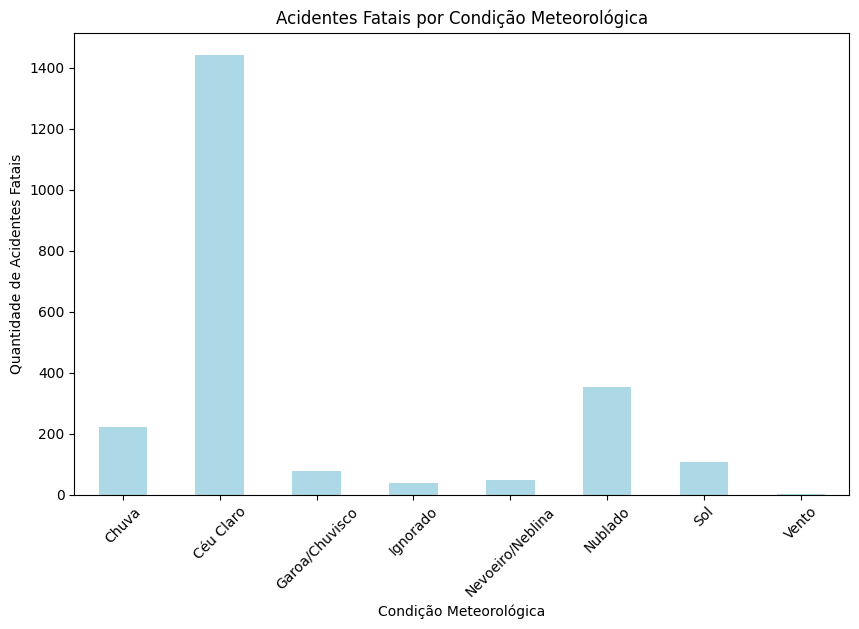

In [51]:
# Quantidade de acidentes por ano com vítimas fatais
df['data_inversa'] = pd.to_datetime(df['data_inversa'])

# Filtrar as linhas com vítimas fatais
acidentes_com_vitimas_fatais = df[df['mortos'] > 0]

# Mesclando a coluna Céu Claro com Ceu Claro
acidentes_com_vitimas_fatais['condicao_metereologica'] = acidentes_com_vitimas_fatais['condicao_metereologica'].str.replace('Ceu Claro', 'Céu Claro')

# Agrupar os dados por condição meteorológica
grupo_por_condicao_meteorologica = acidentes_com_vitimas_fatais.groupby('condicao_metereologica')

# Contar o número de acidentes fatais para cada condição meteorológica
acidentes_fatais_por_condicao = grupo_por_condicao_meteorologica.size()

plt.figure(figsize=(10, 6))
acidentes_fatais_por_condicao.plot(kind='bar', color='lightblue')
plt.title('Acidentes Fatais por Condição Meteorológica')
plt.xlabel('Condição Meteorológica')
plt.ylabel('Quantidade de Acidentes Fatais')
plt.xticks(rotation=45)
plt.show()

In [52]:
# Obtendo dados com vídima fatais
acidentes_com_vitimas_fatais = df[df['mortos'] > 0]

# Agrupando os dados por BR
acidentes_fatais_por_br = acidentes_com_vitimas_fatais['br'].value_counts()

# Reduzido a quantidade de BRs para 10
top_10_br_acidentes_fatais = acidentes_fatais_por_br.head(10)

print("Top 10 BRs com Mais Acidentes Fatais:")
print(top_10_br_acidentes_fatais)


Top 10 BRs com Mais Acidentes Fatais:
116.0    330
101.0    300
153.0    107
163.0     93
316.0     84
40.0      84
381.0     77
364.0     64
277.0     63
230.0     58
Name: br, dtype: int64


In [56]:

# Verificando os veriados no brasil
br_holidays = holidays.Brazil()

# Função para verificar se uma data é um feriado
def is_holiday(date):
    return date in br_holidays

# Converta a coluna 'data_inversa' para o formato de data
df['data_inversa'] = pd.to_datetime(df['data_inversa'], format='%Y-%m-%d')

# Crie uma nova coluna 'feriado' que indica se a data é um feriado
df['feriado'] = df['data_inversa'].apply(is_holiday)

# Visualize as primeiras linhas do DataFrame com a nova coluna
df.head(5)


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,mes,feriado
0,496519,2023-01-01,domingo,02:00:00,ES,101.0,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,...,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES,Jan,True
1,496543,2023-01-01,domingo,03:40:00,SP,116.0,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,...,4,0,1,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP,Jan,True
2,496590,2023-01-01,domingo,01:40:00,MT,163.0,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,...,0,1,1,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT,Jan,True
3,496610,2023-01-01,domingo,10:40:00,PR,376.0,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,...,0,0,1,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR,Jan,True
4,496659,2023-01-01,domingo,14:55:00,MG,116.0,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,...,0,2,2,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG,Jan,True


In [57]:
# Contagem de acidentes em feriados e não feriados
acidentes_em_feriados = df[df['feriado'] == True]['id'].count()
acidentes_em_nao_feriados = df[df['feriado'] == False]['id'].count()

print(f"Acidentes em feriados: {acidentes_em_feriados}")
print(f"Acidentes em não feriados: {acidentes_em_nao_feriados}")


Acidentes em feriados: 821
Acidentes em não feriados: 31252


In [58]:
# Contagem de acidentes fatais em feriados e não feriados
acidentes_fatais_em_feriados = df[(df['feriado'] == True) & (df['mortos'] > 0)]['id'].count()
acidentes_fatais_em_nao_feriados = df[(df['feriado'] == False) & (df['mortos'] > 0)]['id'].count()

print(f"Acidentes fatais em feriados: {acidentes_fatais_em_feriados}")
print(f"Acidentes fatais em não feriados: {acidentes_fatais_em_nao_feriados}")


Acidentes fatais em feriados: 67
Acidentes fatais em não feriados: 2227
